<div style="border:solid Chocolate 2px; padding: 40px">

<b> Валерий, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

## Откройте и изучите файл

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import dump
from sklearn.dummy import DummyClassifier

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!

In [2]:
# 'dtr' - data of tariff recommendations (данные тарифных рекомендаций)
try:
    dtr = pd.read_csv('D:\\Python\\New_Project\\users_behavior.csv')
except:
    dtr = pd.read_csv('/datasets/users_behavior.csv')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Данные загрузили - отлично!
    
Здорово, что ты используешь конструкцию ``try-except`` для путей файлов. Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')
    
Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.
    

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Большое спасибо, за полезную информацию!👍*
</div>

In [3]:
dtr.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
dtr.columns

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Данные осмотрели - отлично!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Анализ стоит делать чуть более глубоким - полезно делать:
- анализ распределения признаков с помощью гистограмм, чтобы понять их распределение и выбрать походящую стратегию работы с ними;
- ящик с усами для поиска аномалий;
- анализ корреляции для поиска зависимостей между данными.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

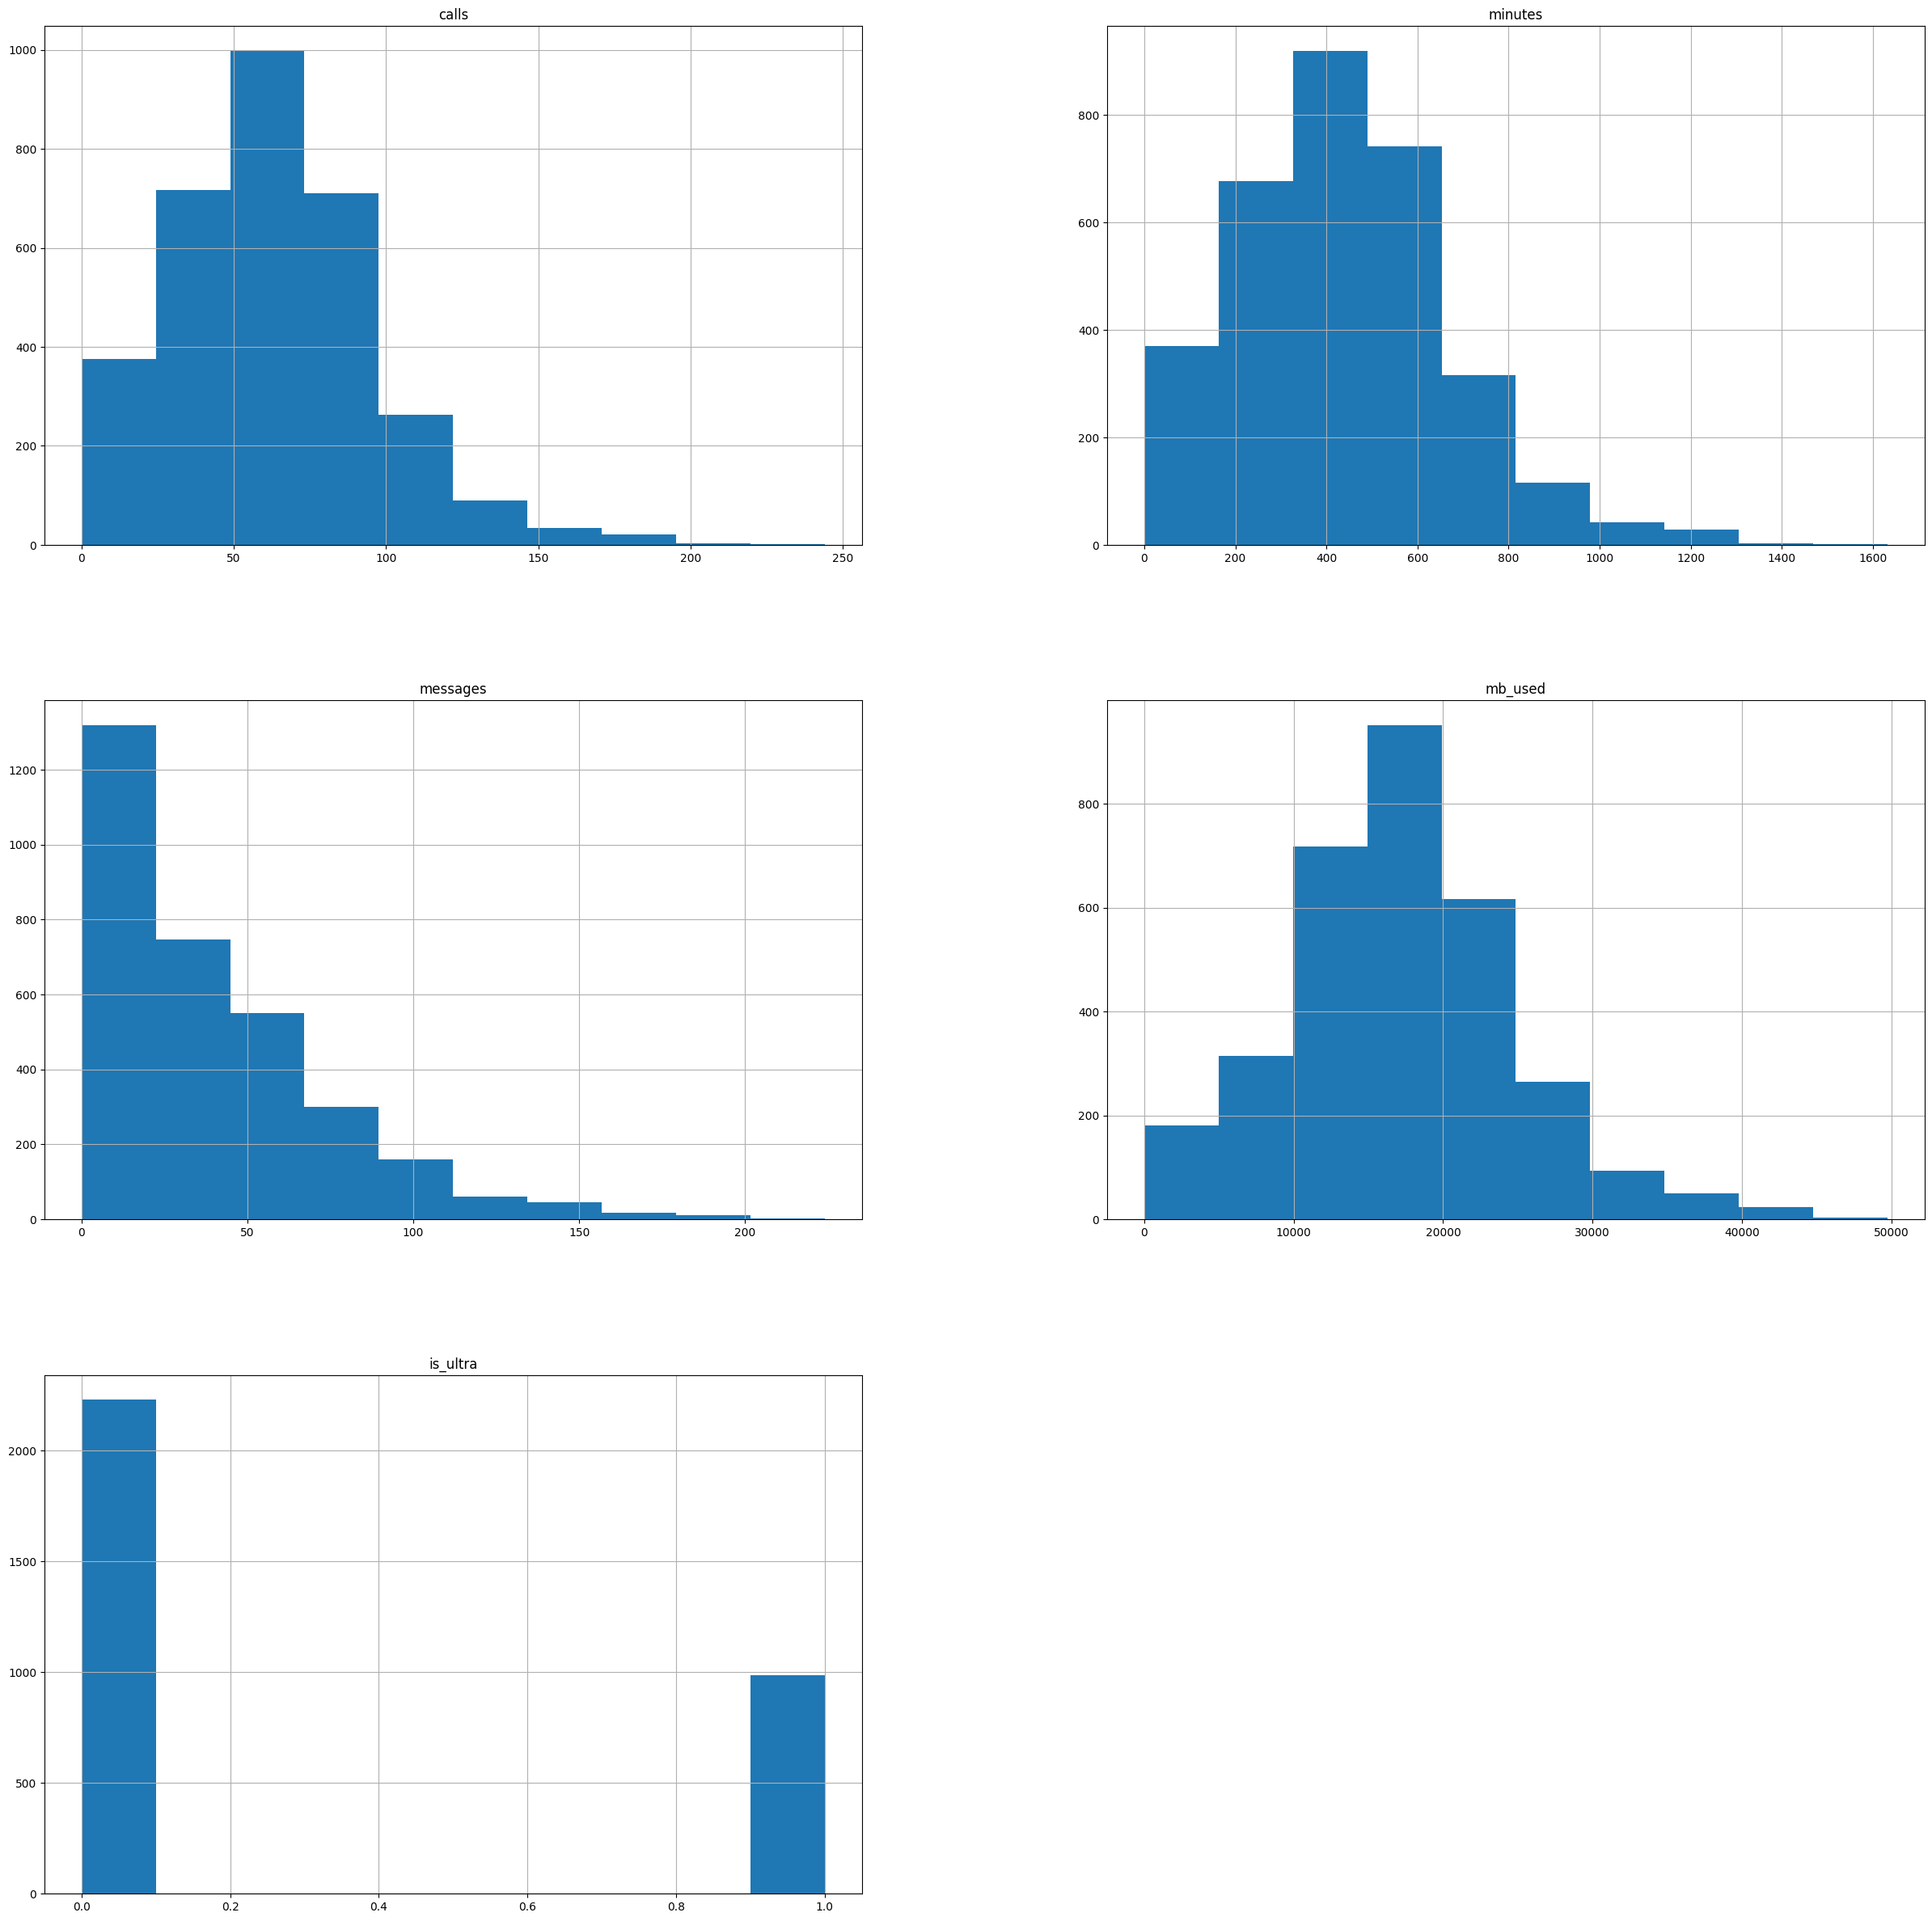

In [6]:
dtr.hist(figsize=(30, 30))
plt.show()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

При работе с графиками важно соблюдать следующие правила:
1. Стоит подписать названия осей X и Y.
2. Также стоит дать название графику.
3. Технические комментарии типа `<AxesSubplot:xlabel='datetime'>` стоит убирать - это можно сделать, поставив точку с запятой в последней строке кода в блоке визуализации, либо сделать последней строкой кода этого блока метод `plt.show()`.
4. Графики нужно сделать больше - графики дефолтного размера не очень удобны для чтения. Удобнее будет настроить параметр `plt.rcParams["figure.figsize"] = (x,y)` сразу в ячейке импорта библиотек, и все графики проекта будут одного размера.
        
Несколько таких нехитрых приёмов очень повысят ценность твоей визуализации:)
        
Убедись, пожалуйста, что графики в твоём проекте соответствуют этим правилам.

    
Отмечу, что метод `hist` не поддаётся кастомизации, поэтому каждый график нужно рисовать отдельно, но процесс можно автоматизировать с помощью цикла.

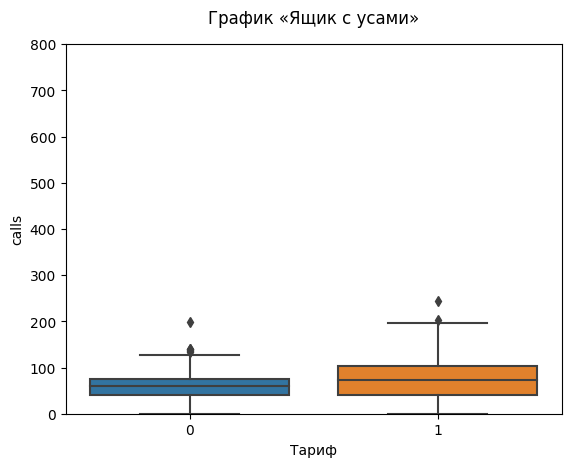

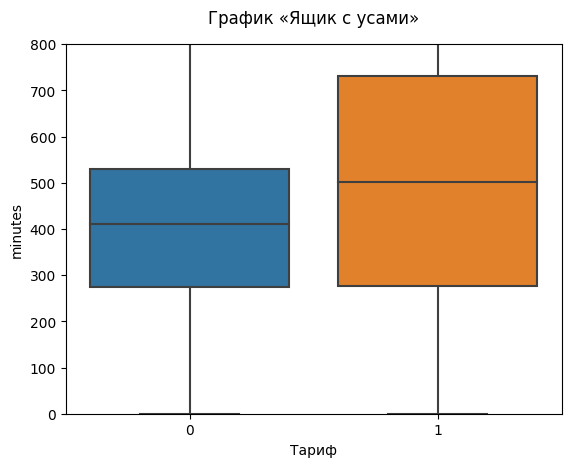

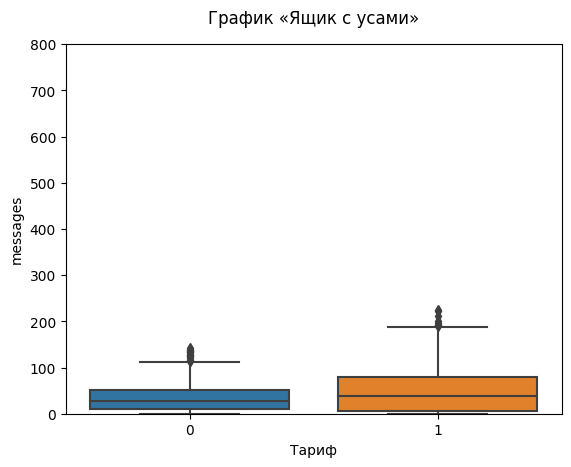

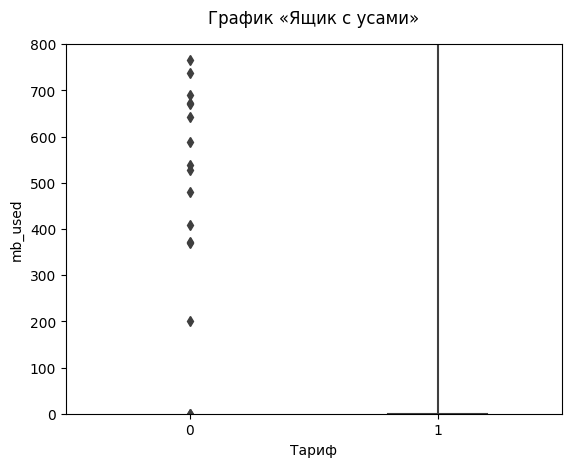

In [7]:
for i in ['calls', 'minutes', 'messages', 'mb_used']: 
    sns.boxplot(x=dtr['is_ultra'], y=dtr[i])
    plt.ylim (0, 800) 
    plt.title(label='График «Ящик с усами»', pad=15)
    plt.xlabel('Тариф')
    plt.ylabel(i)
    plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Результаты анализа обязательно нужно прокомментировать.

<div class="alert alert-info">

**Вывод:** 

- Мы располагаем датафреймом, у которого нет категориальных признаков,
- При этом данные близки к "нормальному распределению" и распределению "Пуассона" и не имеют пропусков. Значит к ним можно применить методы машинного обучения.
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

## Разбейте данные на выборки

#### Разделим исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1, при этои размеры тестового и валидационного наборов обычно равны.

In [8]:
dtr_train, dtr_valid_test = train_test_split(dtr, test_size=0.4, random_state=12345)
dtr_valid, dtr_test = train_test_split(dtr_valid_test, test_size=0.5, random_state=12345)

In [9]:
dtr_train.shape, dtr_valid_test.shape, dtr_valid.shape, dtr_test.shape

((1928, 5), (1286, 5), (643, 5), (643, 5))

#### Библиотеки машинного обучения требуют, чтобы признаки были сохранены в отдельных переменных: 

- **features** — запишим в неё признаки;
- **target** — запишим в неё целевой признак.

In [10]:
features_train = dtr_train.drop(['is_ultra'], axis=1)
target_train = dtr_train['is_ultra']
features_valid = dtr_valid.drop(['is_ultra'], axis=1)
target_valid = dtr_valid['is_ultra']
features_test = dtr_valid.drop(['is_ultra'], axis=1)
target_test = dtr_valid['is_ultra']

#### Выведим на экран размеры этих выборок.

In [11]:
features_train.shape, features_valid.shape, features_test.shape, target_train.shape, target_valid.shape, target_test.shape

((1928, 4), (643, 4), (643, 4), (1928,), (643,), (643,))

**Вывод:** ошибок нет, данные разделены корректно.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Выборки просплитованы корректно. Чтобы в выборках был сохранён равный баланс классов, можно использовать парамер `stratify` у `train_test_split`, передав ему название признаков, по которым нужна стратификация (в нашем случае - `is_ultra`).

## Исследуйте модели

#### Так как в имеющихся данных нет категоральных признаков, а целевой признак представлен в бинарном виде, то данное исследование сводится к оценке решения задач бинарной классификации с помощью использования следующих моделей:

- Дерево решений - **DecisionTreeClassifier** библиотеки: **sklearn.tree**
- Случайный лес - **RandomForestClassifier** библиотеки **sklearn.ensemble**
- Логистическая регрессия - **LogisticRegression** библиотеки **sklearn.linear_model** 


### Дерево решений - DecisionTreeClassifier

In [12]:
# создадим пустую модель и сохраните её в переменной
model_tree = DecisionTreeClassifier(random_state=12345)
# обучим модель вызовом метода fit()
model_tree.fit(features_train, target_train)

DecisionTreeClassifier(random_state=12345)

In [13]:
# Предсказание для целевого признака
tree_valid_predictions = model_tree.predict(features_valid)
# Анализ качества модели
tree_accuracy = accuracy_score(target_valid, tree_valid_predictions)
tree_accuracy

0.713841368584759

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Оценили `DecisionTreeClassifier` на `valid` - отлично!

#### Самый важный гиперпараметр решающего дерева — max_depth. Перебем разные значения параметра max_depth и сравним качество моделей в разных вариантах. Для каждого значения max_depth напечатаем на экране качество на валидационной выборке.

In [14]:
best_model_tree1 = None
best_result = 0
best_depth = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    
    # < обучим модель >
    model.fit(features_train, target_train)
    
    # < найдем предсказания на валидационной выборке >
    predictions_valid = model.predict(features_valid)
    
    # посчитайте качество модели на валидационной выборке
    result = accuracy_score(target_valid, predictions_valid)
    
    if result > best_result:
        # сохраним наилучшую модель
        best_model_tree1 = model 
        # сохраним наилучшее значение метрики accuracy на валидационных данных
        best_result = result
        # сохраним наилучшее значение метрики n_estimators на валидационных данных
        best_depth = depth
        
print("Наилучшея модель на валидационной выборке с criterion='gini':")
print(best_model_tree1)
print("'max_depth', наилучшая глубина дерева:", best_depth)
print("'accuracy', наилучшей модели на валидационной выборке:", best_result)

Наилучшея модель на валидационной выборке с criterion='gini':
DecisionTreeClassifier(max_depth=3, random_state=12345)
'max_depth', наилучшая глубина дерева: 3
'accuracy', наилучшей модели на валидационной выборке: 0.7853810264385692


####  Второй по важности гиперпараметр решающего дерева - criterion. Поменяем его значение на: criterion='entropy'

In [15]:
best_model_tree2 = None
best_result = 0
best_depth = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, criterion='entropy')
    
    # < обучим модель >
    model.fit(features_train, target_train)
    
    # < найдем предсказания на валидационной выборке >
    predictions_valid = model.predict(features_valid)
    
    # посчитайте качество модели на валидационной выборке
    result = accuracy_score(target_valid, predictions_valid)
    
    if result > best_result:
        # сохраним наилучшую модель
        best_model_tree2 = model 
        # сохраним наилучшее значение метрики accuracy на валидационных данных
        best_result = result
        # сохраним наилучшее значение метрики n_estimators на валидационных данных
        best_depth = depth
        
print("Наилучшея модель на валидационной выборке с criterion='entropy':")
print(best_model_tree2)
print("'max_depth', наилучшая глубина дерева:", best_depth)
print("'accuracy', наилучшей модели на валидационной выборке:", best_result)

Наилучшея модель на валидационной выборке с criterion='entropy':
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=12345)
'max_depth', наилучшая глубина дерева: 3
'accuracy', наилучшей модели на валидационной выборке: 0.7853810264385692


**Вывод:** Качество модели не мзменилось. 

**При этом оптимальная глубина дерева в комбинации c criterion='entropy' так же составила: max_depth = 3**

<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Для `DecisionTreeClassifier` оптимизировали гиперпараметры и вывели оценку на `valid`.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Для гиперпараметра `max_depth` рассматривается очень длинная последовательность: деревья с большой глубиной склонны к переобучению, а обучаются и предсказывают результат они дольше, поэтому делать их слишком глубокими не стоит - оптимальное значение почти всегда лежит в диапазоне от 2 до 5-6. Кроме того, можно попробовать значение `None` - в итоге оптимальная последовательность может выглядеть как `[None] + [i for i in range(2, 7)]`.
</div>

### Случайный лес - RandomForestClassifier

***Случайный лес помогает улучшить результат предсказания и избежать переобучения***

In [16]:
# создадим пустую модель и сохраните её в переменной
model_forest = RandomForestClassifier(random_state=12345)
# обучим модель вызовом метода fit()
# .values выдаст значения в numpy массиве (форма: (n,1)), .ravel преобразует эту форму массива в (n, ) (т.е. сгладит ее)
model_forest.fit(features_train, target_train)

RandomForestClassifier(random_state=12345)

In [17]:
model_forest.fit(features_train, target_train)
model_forest.score(features_valid, target_valid) 

0.7853810264385692

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Оценка получена для `DecisionTreeClassifier` - у `RandomForestClassifier` объект модели называется `model_forest`.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

#### Наиболее важный в алгоритме "Случайный лес" и управляет количеством деревьев в лесу гиперпараметр - 'n_estimators', который при совместном использовании с гиперпараметром - criterion='entropy', улучшает метрику 'accuracy' отжающую отношение числа правильных ответов к размеру тестовой выборки.

In [18]:
best_model = None
best_result = 0
best_est = 0
for est in range(1, 100, 4):
    # обучите модель с заданным количеством деревьев
    model = RandomForestClassifier(random_state=12345, n_estimators=est, criterion='entropy')
    # обучите модель на тренировочной выборке
    model.fit(features_train, target_train)
    # посчитайте качество модели на валидационной выборке
    result = model.score(features_valid, target_valid) 
    if result > best_result:
        # сохраним наилучшую модель
        best_model = model 
        # сохраним наилучшее значение метрики accuracy на валидационных данных
        best_result = result
        # сохраним наилучшее значение метрики n_estimators на валидационных данных
        best_est = est

print("'accuracy', наилучшей модели на валидационной выборке:", best_result)
print("'n_estimators', наилучшее количество деревьев:", best_est)

'accuracy', наилучшей модели на валидационной выборке: 0.7962674961119751
'n_estimators', наилучшее количество деревьев: 45


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Для гиперапараметра `n_estimators` стоит задавать больший шаг последовательности: перебор по одному дереву будет неэффективен с точки зрения роста метрики, но будет существенно растягивать процесс поиска лучшей модели.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

#### Дополнительно немного повысить значение 'accuracy' можно за счет изменния гиперпараметра отвечающего за глубину дерева - 'max_depth'

In [19]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for depth in range (1, 40):
    # обучите модель с заданным количеством деревьев
    model = RandomForestClassifier(random_state=12345, n_estimators=45, max_depth=depth, criterion='entropy')
    # обучите модель на тренировочной выборке
    model.fit(features_train, target_train)
    # посчитайте качество модели на валидационной выборке
    result = model.score(features_valid, target_valid) 
    if result > best_result:
        # сохраним наилучшую модель
        best_model = model 
        # сохраним наилучшее значение метрики accuracy на валидационных данных
        best_result = result
        # сохраним наилучшее значение метрики max_depth на валидационных данных
        best_depth = depth

print("'accuracy', наилучшей модели на валидационной выборке:", best_result)
print("'max_depth', наилучшая глубина дерева:", best_depth)

'accuracy', наилучшей модели на валидационной выборке: 0.8040435458786936
'max_depth', наилучшая глубина дерева: 6


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 
        
1. Аналогично по `max_depth`.
2. Гиперпараметры стоит оптимизировать одновременно: не факт, что при значении `n_estimators=66` вообще существует оптимальное значение у `max_depth`.

#### Дополнительно попробуем повысить значение 'accuracy' за счет изменния гиперпараметра min_samples_split

In [20]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
best_sample = 0
for est in range(1, 100, 5):
    for depth in range (1, 40):
        for sample in (2, 10):
            # обучите модель с заданным количеством деревьев
            model = RandomForestClassifier(
                random_state=12345, n_estimators=est, max_depth=depth, criterion='entropy', min_samples_split=sample)
            # обучите модель на тренировочной выборке
            model.fit(features_train, target_train)
            # посчитайте качество модели на валидационной выборке
            result = model.score(features_valid, target_valid) 
            if result > best_result:
                # сохраним наилучшую модель
                best_model = model 
                # сохраним наилучшее значение метрики accuracy на валидационных данных
                best_result = result
                # сохраним наилучшее значение метрики n_estimators на валидационных данных
                best_est = est
                # сохраним наилучшее значение метрики max_depth на валидационных данных
                best_depth = depth
                # сохраним наилучшее значение метрики max_depth на валидационных данных
                best_sample = sample

print("'accuracy', наилучшей модели на валидационной выборке:", best_result)
print("'n_estimators', наилучшее количество деревьев:", best_est)
print("'max_depth', наилучшая глубина дерева:", best_depth)
print("'min_samples_split', наилучшее значение:", best_sample)

'accuracy', наилучшей модели на валидационной выборке: 0.807153965785381
'n_estimators', наилучшее количество деревьев: 21
'max_depth', наилучшая глубина дерева: 6
'min_samples_split', наилучшее значение: 2


<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Для `RandomForestClassifier` оптимизировали гиперпараметры и вывели оценку на `valid`.
</div>

### Логистическая регрессия - LogisticRegression

In [21]:
# создадим пустую модель и сохраним её в переменной
model_logistic = LogisticRegression(random_state=12345, solver='liblinear', multi_class='auto', max_iter=1000)
# обучим модель вызовом метода fit()
model_logistic.fit(features_train, target_train)
# Предсказание для целевого признака
logistic_valid_predictions = model_logistic.predict(features_valid)
# Анализ качества модели
logistic_accuracy = accuracy_score(target_valid, logistic_valid_predictions)
logistic_accuracy

0.7091757387247278

#### Прповерим как меняется качество модели изменяя гиперпараметры: 'solver' и 'multi_class'

In [22]:
best_model = None
best_result = 0
best_solver = None
for sol in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']:
    # обучим модель с заданным количеством деревьев
    model = LogisticRegression(random_state=12345, solver=sol, multi_class='auto', max_iter=1000)
    # обучим модель на тренировочной выборке
    model.fit(features_train, target_train)
    # посчитайте качество модели на валидационной выборке
    result = model.score(features_valid, target_valid) 
    if result > best_result:
        # сохраним наилучшую модель
        best_model = model 
        # сохраним наилучшее значение метрики accuracy на валидационных данных
        best_result = result
        # сохраним наилучшее значение метрики n_estimators на валидационных данных
        best_solver = sol
        
print("'accuracy', наилучшей модели на валидационной выборке:", best_result)
print("'solver', наилучший алгоритм оптимизации:", best_solver)

'accuracy', наилучшей модели на валидационной выборке: 0.7558320373250389
'solver', наилучший алгоритм оптимизации: newton-cg


In [23]:
best_model = None
best_result = 0
best_solver = None
for sol in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']:
    # обучим модель с заданным гиперпараметрами
    model = LogisticRegression(random_state=12345, solver=sol, multi_class='ovr', max_iter=1000)
    # обучим модель на тренировочной выборке
    model.fit(features_train, target_train)
    # посчитайте качество модели на валидационной выборке
    result = model.score(features_valid, target_valid) 
    if result > best_result:
        # сохраним наилучшую модель
        best_model = model 
        # сохраним наилучшее значение метрики accuracy на валидационных данных
        best_result = result
        # сохраним наилучшее значение метрики n_estimators на валидационных данных
        best_solver = sol
        
print("'accuracy', наилучшей модели на валидационной выборке:", best_result)
print("'solver', наилучший алгоритм оптимизации:", best_solver)

'accuracy', наилучшей модели на валидационной выборке: 0.7558320373250389
'solver', наилучший алгоритм оптимизации: newton-cg


**Вывод**: качество модели Логистическая регрессия - LogisticRegression при изменении основных гиперпараметров не изменяется

<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Для `LogisticRegression` оптимизировали гиперпараметры и вывели оценку на `valid`.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Для линейных моделей полезно оптимизировать гиперпараметр `C`, определяющий силу регуляризации - он помогает в борьбе с переобучением, а также снижает влияние эффекта мультиколлинеарности.
        

**Общий вывод по результатам исследования моделе: наибольшее качество модель получено при использовании алгоритма: Случайный лес - RandomForestClassifier**

<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выбрали лучшую модель.

## Проверьте модель на тестовой выборке

#### Вернемся к расширинной выборке:

#### Повторим обучение модели 'Случайный лес - RandomForestClassifier' уже с определенными гиперпараметрами теперь на расширенной выборке:

In [24]:
dtr_train_valid = pd.concat([dtr_train, pd.DataFrame(dtr_valid)], ignore_index=True)

In [25]:
dtr_train_valid.shape

(2571, 5)

<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее решение - модель получит больше примеров для обучения.

#### Сохраним признаки расширенной выборки в отдельные переменные:

- features — запишим в неё признаки;

- target — запишим в неё целевой признак.

In [26]:
features_train_valid = dtr_train_valid.drop(['is_ultra'], axis=1)
target_train_valid = dtr_train_valid['is_ultra']

#### Обучим модель с наилучши гиперпараметрами на тренирорвочной выборке

In [27]:
model_forest_test = RandomForestClassifier(
    random_state=12345, n_estimators=21, max_depth=6,  criterion='entropy', min_samples_split=2)

model_forest_test.fit(features_train_valid, target_train_valid)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=21,
                       random_state=12345)

 #### Найдем предсказания на валидационной выборке

In [28]:
forest_valid_predictions = model_forest_test.predict(features_valid)

#### Посчитайте качество модели на валидационной выборке

In [29]:
forest_accuracy = accuracy_score(target_test, forest_valid_predictions)
forest_accuracy

0.8211508553654744

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Функция `score` оценивает модель по `Accuracy`, ты сделал это выше - дублировать не стоит.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> На `train` модели оценивать не нужно, эта оценка не будет показательной, так как получена она будет на данных, которые участвовали в обучении модели.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

## (бонус) Проверьте модели на адекватность

#### Модель случайеных результатов можно получить воспользовавшись функцией "DummyClassifier()" из пакета sklearn.dummy

In [30]:
dummy_model = DummyClassifier(strategy='uniform', random_state=12345)

#### Обучим полученную нами модель случайеных результатов на имеющихся у нас данных и с помощью функции .score определим толчность предсказаний

In [31]:
dummy_model.fit(features_train_valid, target_train_valid)
dummy_model.score(features_test, target_test)

0.5038880248833593

**Вывод:** Данная модель предсказывает на наших данных случайный результат с точностью 50 %.

<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Круто, что сравниваешь лучшую модель с контантной - теперь мы точно уверены, что делали работу не зря:)

### Общий вывод:

**Обученная модель на алгоритме 'Случайный лес - RandomForestClassifier' работает лучше чем модель на случайных результатах.

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Валерий, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.
    
Работа с моделями также выполнена отлично: 
- исследовано несколько алгоритмов, проведён подбор гиперпараметров исследованных моделей, выполнена их промежуточная оценка на `valid`; 
- сплитование на выборки выполнено корректно;
- процесс обучения и тестирования организован верно, не были допущены утечки из `valid` и/или `test` в ходе обучения.

Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Большое спасибо, за положительную оценку моего проекта! Хочу пожелать Вам, в дальнейшим интересных проектов и новых открытий!👍*
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.2.

Валерий, все замечания учтены - проект принят!
    
Приношу извинения за длительное ожидание ответа - была техническая проблема на стороне платформы, из-за которой твой проект не был виден. 
    
Спасибо за хорошую работу над проектом, желаю успехов в дальнейшем обучении:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Большое спасибо! Если что не так, то извините. Вам всего хорошего и удачи!
</div>